In [1]:
import pandas as pd
import numpy as np

In [14]:
data=pd.read_csv('Train.csv')
data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [16]:
def inspect_data(data):
    return pd.DataFrame({'Type': data.dtypes, 'Levels': data.apply(lambda x: x.unique().shape[0],axis=0), 'Labels': data.apply(lambda x: str(x.unique()), axis=0)})
inspect_data(data)

,Type,Levels,Labels
id_code,object,1284,['isfywypmkqqhyft' 'mqsfxyvuqpbwomk' 'alspwwtb...
current_date,object,61,['2016-07-27' '2016-07-28' '2016-07-29' '2016-...
current_time,object,1262,['08:05:51 PM' '08:06:11 PM' '08:08:57 PM' ......
source_name,object,188,['station$147' 'station$130' 'station$248' 'st...
destination_name,object,218,['station$1' 'station$214' 'station$248' 'stat...
train_name,object,560,['ICZVZS' 'UNDEFINED' 'ICWVYA' 'ICZVXY' 'ICXUY...
target,object,3,['high' 'medium' 'low']
country_code_source,object,5,['whber' 'wsluu' nan 'logbp' 'qwnll']
longitude_source,float64,188,[4.356801 4.360846 5.497685 4.482076 3.710675 ...
latitude_source,float64,188,[50.845658 50.859663 50.967057 50.896456 51.03...


In [17]:
data.drop(['destination_name','id_code','source_name','train_name','country_code_destination', 'country_code_source'], axis=1, inplace=True)

In [18]:
data.isnull().sum()

current_date                    0
current_time                    0
target                          0
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

current_date                   0
current_time                   0
target                         0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [24]:
data.head()

,current_date,current_time,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,current_hour
31,2016-07-27,11:41:46 PM,high,4.360846,50.859663,640.265896,4.482785,51.017648,306.523121,2016,30,Wednesday,False,23
32,2016-07-28,12:04:25 AM,low,5.497685,50.967057,39.476879,5.497685,50.967057,39.476879,2016,30,Thursday,False,0
34,2016-07-28,12:18:09 AM,low,5.497685,50.967057,39.476879,4.356801,50.845658,634.164740,2016,30,Thursday,False,0
35,2016-07-28,12:38:28 AM,high,4.482076,50.896456,171.020231,4.360846,50.859663,640.265896,2016,30,Thursday,False,0
36,2016-07-28,08:50:27 AM,medium,3.710675,51.035896,309.014451,4.356801,50.845658,634.164740,2016,30,Thursday,False,8


In [23]:
data['current_hour']= pd.to_datetime(data.current_time).dt.hour

In [25]:
data.drop(['current_date','current_year','current_time','current_week'], axis=1, inplace=True)

In [26]:
#Clustering spaial analysis
data.columns

Index(['target', 'longitude_source', 'latitude_source',
       'mean_halt_times_source', 'longitude_destination',
       'latitude_destination', 'mean_halt_times_destination', 'current_day',
       'is_weekend', 'current_hour'],
      dtype='object')

In [28]:
spatial_data=data[['longitude_destination','longitude_source','latitude_source','latitude_destination']]

In [31]:
#Normalizing spatal data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
spatial_data=pd.DataFrame( scaler.fit_transform(spatial_data), columns=spatial_data.columns)

In [32]:
spatial_data

,longitude_destination,longitude_source,latitude_source,latitude_destination
0,0.626976,0.734556,0.534061,0.847436
1,0.779875,0.920669,0.581027,0.841767
2,0.607997,0.920669,0.581027,0.828163
3,0.608606,0.754403,0.550152,0.829733
4,0.607997,0.628116,0.611132,0.828163
...,...,...,...,...
1245,0.716898,0.734556,0.534061,0.817212
1246,0.662091,0.628116,0.611132,0.832267
1247,0.609287,0.733894,0.527936,0.805726
1248,0.612112,0.733894,0.527936,0.790086


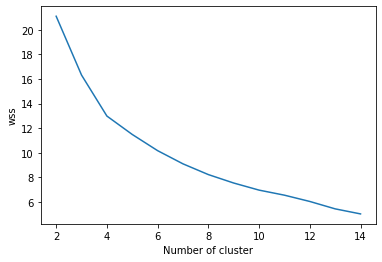

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wss = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(spatial_data)
    wss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()

plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("wss")
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=4, random_state=1240)
kmeans_object.fit(spatial_data)
data['cluster'] = kmeans_object.predict(spatial_data)

In [36]:
data['cluster']

31      1
32      3
34      2
35      1
36      0
       ..
1279    1
1280    0
1281    1
1282    1
1283    2
Name: cluster, Length: 1250, dtype: int32

In [38]:
#Decoupling target
y=data['target']
X=data[data.columns.difference(['target'])]
print(y.shape, X.shape)

(1250,) (1250, 10)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(875, 10) (875,) (375, 10) (375,)


In [40]:
y_train.value_counts()

low       372
high      263
medium    240
Name: target, dtype: int64

In [41]:
y_test.value_counts()

low       159
high      113
medium    103
Name: target, dtype: int64

In [42]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)


In [45]:
print(X_train.shape, X_test.shape)

(875, 16) (375, 16)


In [44]:
#Alignment of dataframe
X_train, X_test=X_train.align(X_test, join='left', fill_value=0, axis=1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
full_scaler=MinMaxScaler()
full_scaler.fit(X_train)
X_train = pd.DataFrame(full_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(full_scaler.transform(X_test), columns=X_test.columns)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)

logistic_train_preds = logistic.predict(X_train)
logistic_test_preds = logistic.predict(X_test)

print(confusion_matrix(y_train, logistic_train_preds))
print(confusion_matrix(y_test, logistic_test_preds))

print(classification_report(y_train, logistic_train_preds))
print(classification_report(y_test, logistic_test_preds))

[[136  68  59]
 [ 90 213  69]
 [ 74  88  78]]
[[39 43 31]
 [46 70 43]
 [37 31 35]]
              precision    recall  f1-score   support

        high       0.45      0.52      0.48       263
         low       0.58      0.57      0.57       372
      medium       0.38      0.33      0.35       240

    accuracy                           0.49       875
   macro avg       0.47      0.47      0.47       875
weighted avg       0.49      0.49      0.49       875

              precision    recall  f1-score   support

        high       0.32      0.35      0.33       113
         low       0.49      0.44      0.46       159
      medium       0.32      0.34      0.33       103

    accuracy                           0.38       375
   macro avg       0.38      0.38      0.37       375
weighted avg       0.39      0.38      0.39       375



In [49]:
from sklearn.svm import SVC
svm1=SVC(class_weight='balanced', C=0.1,  gamma=1, kernel='rbf')
svm1.fit(X_train, y_train)
svm_train_preds=svm1.predict(X_train)
svm_test_preds=svm1.predict(X_test)

In [50]:
print(confusion_matrix(y_train, svm_train_preds))
print(confusion_matrix(y_test, svm_test_preds))

[[114  78  71]
 [ 66 240  66]
 [ 53  98  89]]
[[33 48 32]
 [35 84 40]
 [25 41 37]]


In [51]:
print(classification_report(y_train, svm_train_preds))
print(classification_report(y_test, svm_test_preds))

              precision    recall  f1-score   support

        high       0.49      0.43      0.46       263
         low       0.58      0.65      0.61       372
      medium       0.39      0.37      0.38       240

    accuracy                           0.51       875
   macro avg       0.49      0.48      0.48       875
weighted avg       0.50      0.51      0.50       875

              precision    recall  f1-score   support

        high       0.35      0.29      0.32       113
         low       0.49      0.53      0.51       159
      medium       0.34      0.36      0.35       103

    accuracy                           0.41       375
   macro avg       0.39      0.39      0.39       375
weighted avg       0.41      0.41      0.41       375



In [56]:
from sklearn.svm import SVC
svm2=SVC(class_weight='balanced', C=0.1,  gamma=1, kernel='rbf',probability=True)
svm2.fit(X_train, y_train)
svm_train_preds2=svm1.predict(X_train)
svm_test_preds2=svm1.predict(X_test)

In [57]:
svm1.probability=True
svm_train_preds_prob=svm2.predict_proba(X_train)
svm_test_preds_prob=svm2.predict_proba(X_test)

In [58]:
svm_train_preds_prob

array([[0.3975588 , 0.30721888, 0.29522232],
       [0.18571778, 0.53854279, 0.27573943],
       [0.18148275, 0.53808997, 0.28042728],
       ...,
       [0.21512513, 0.51949597, 0.2653789 ],
       [0.32688764, 0.38834983, 0.28476253],
       [0.22785279, 0.50143644, 0.27071077]])